In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../Data/Advertising.csv', index_col=0)

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## EDA - Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [13]:
df.describe().T #.T ger transponatet



,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [14]:
# 200 samples, 3 features, 1 label (facit)
df.shape 

(200, 4)

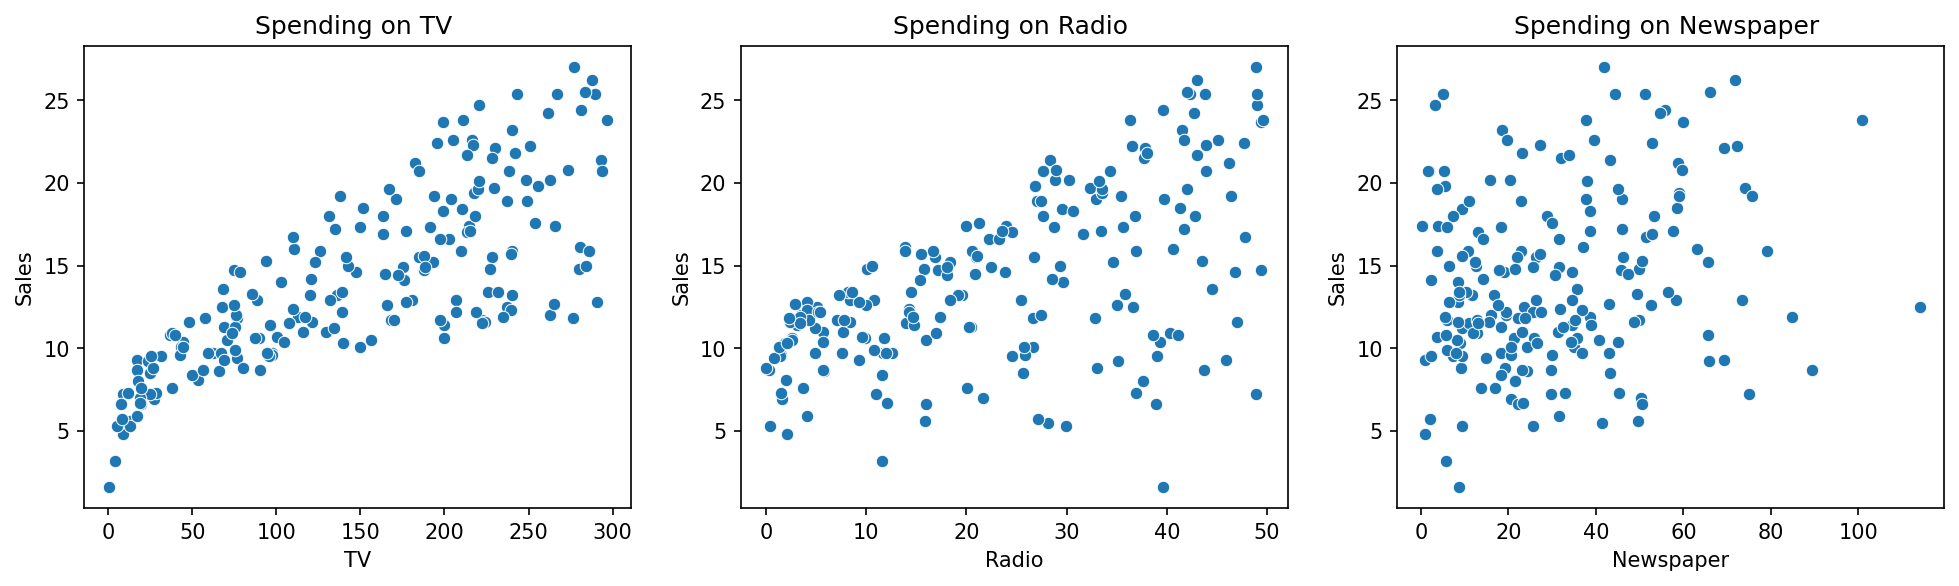

In [23]:
number_features = df.shape[1]-1
fig, ax = plt.subplots(1, number_features, figsize=(16, 4), dpi=150)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, 
                    x=feature,
                    y='Sales',
                    ax=ax[i])
    ax[i].set_title(f"Spending on {feature} ")

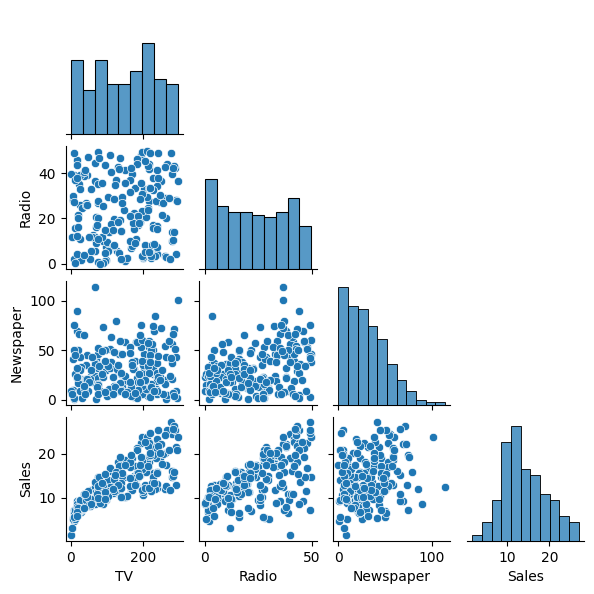

In [26]:
ax = sns.pairplot(df, height=1.5, corner=True) #använd inte denna för många features (fler än 6)

## Simple linear regression

In [27]:
X, y = df['TV'], df['Sales']

X # Begöver ha en massa ettor med sig enligt vår teori

1      230.1
2       44.5
3       17.2
4      151.5
5      180.8
       ...  
196     38.2
197     94.2
198    177.0
199    283.6
200    232.1
Name: TV, Length: 200, dtype: float64

In [28]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [31]:
beta_1, beta_0=np.polyfit(X, y, deg=1) #ger b0 och b1, polyfit är OLS
beta_0, beta_1

(7.032593549127696, 0.04753664043301972)

[Text(0.5, 1.0, 'Regression Line on TV Advertisement')]

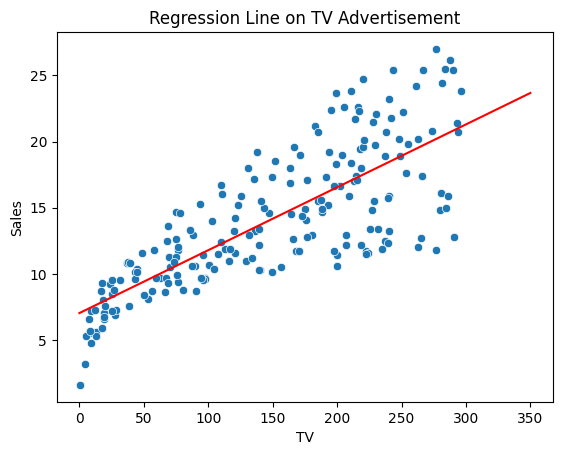

In [38]:
y_hat = lambda x: beta_0 + beta_1*x

spending = np.linspace(0, 350)

ax = sns.scatterplot(df, x='TV', y='Sales')
sns.lineplot(x=spending, y=y_hat(spending), color='red')
ax.set(title="Regression Line on TV Advertisement")

<Axes: xlabel='TV', ylabel='Sales'>

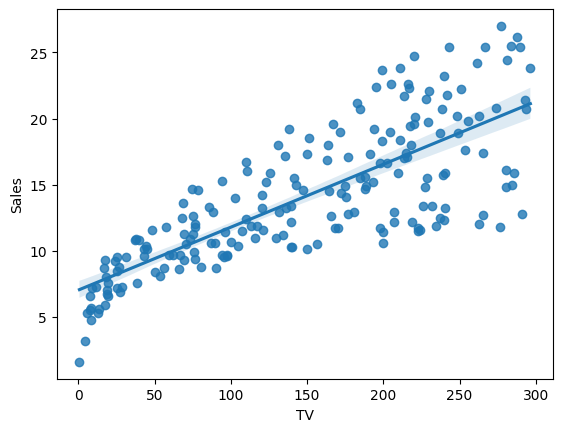

In [39]:
sns.regplot(x=X, y=y)

## Multiple linear regression

In [42]:
X, y = df.drop('Sales', axis='columns'), df['Sales']

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [43]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [44]:
X.insert(0, 'Intercept', 1) # För att få in ettor som i teorin

In [47]:
X.head()

,Intercept,TV,Radio,Newspaper
1,1,230.1,37.8,69.2
2,1,44.5,39.3,45.1
3,1,17.2,45.9,69.3
4,1,151.5,41.3,58.5
5,1,180.8,10.8,58.4


In [49]:
# @-operator - matmul operator
# In numpy - the matmul operator is operator overloaded to handle matrix multiplication
X.T@X

,Intercept,TV,Radio,Newspaper
Intercept,200.0,29408.50,4652.80,6110.80
TV,29408.5,5791118.39,698061.98,919625.28
Radio,4652.8,698061.98,152107.86,164946.55
Newspaper,6110.8,919625.28,164946.55,281096.74


In [53]:
# Normal equation OLS
beta_hat = np.linalg.inv(X.T@X)@X.T@y 
beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [55]:
regression_fit = lambda X, y: np.linalg.inv(X.T@X)@X.T@y 
beta_hat = regression_fit(X, y)
beta_hat # ger linjen

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [59]:
predict = lambda x, beta: np.dot(x, beta) #skalär produkt

test_sample = [1, 230, 38, 69]

y_hat = predict(test_sample, beta_hat)
print(f"With $230k on TV, $38k on radio and $69k on newspaper we get a predicted sales on {y_hat:.1f}k units")

With $230k on TV, $38k on radio and $69k on newspaper we get a predicted sales on 20.6k units


## Train|Test split

In [64]:
train_fraction = int(len(df)*0.7)

train = df.sample(n=train_fraction, random_state=42, replace=False)
train.head()

,TV,Radio,Newspaper,Sales
96,163.3,31.6,52.9,16.9
16,195.4,47.7,52.9,22.4
31,292.9,28.3,43.2,21.4
159,11.7,36.9,45.2,7.3
129,220.3,49.0,3.2,24.7


In [67]:
test = df.drop(train.index)
train.shape, test.shape

((140, 4), (60, 4))

In [73]:
X_train, y_train = train.drop('Sales', axis='columns'), train['Sales']
X_test, y_test = test.drop('Sales', axis='columns'), test['Sales']

X_train.insert(0, 'Intercept', 1)
X_test.insert(0, 'Intercept', 1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((140, 4), (140,), (60, 4), (60,))

## Prediction

In [76]:
beta_hat = regression_fit(X_train, y_train)
print(f"Beta parameters:\n{beta_hat}")

predict = lambda X, weights: X @ weights

beta_hat = np.reshape(beta_hat.to_numpy(), (4,1))

y_hat = predict(X_test, beta_hat).to_numpy()

y_hat[:5] # Är prediktionen för första fem värdena

Beta parameters:
0    2.956094
1    0.046793
2    0.187063
3   -0.004805
dtype: float64


array([[12.17324122],
       [12.19125728],
       [ 3.74653773],
       [ 8.90545078],
       [18.43980126]])

In [78]:
X_test.iloc[1]
# Spending 120.2 on TV, 19.6 on radio and 11.6 on newspaper gives a prediction on 12.19 units

Intercept      1.0
TV           120.2
Radio         19.6
Newspaper     11.6
Name: 8, dtype: float64

## Evaluate model performance

In [85]:
m = len(y_test)
# removed extra dimension (60, 1) --> (60, )
y_hat = np.reshape(y_hat, (m))

mean_absolute_error = 1/m*np.sum(np.abs(y_test-y_hat))
mean_squared_error = 1/m*np.sum((y_test-y_hat)**2)
root_mean_squared_error = np.sqrt(mean_squared_error)

mean_absolute_error, mean_squared_error, root_mean_squared_error

(1.3244490959726523, 3.540425618238498, 1.8816018755939041)